# Movie reviews Classification

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/rev.png" width="1200">



In [21]:
import numpy as np
import pandas as pd
import re
from sklearn.datasets import load_files

import warnings
warnings.filterwarnings('ignore')

In [22]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip

--2023-05-23 17:19:42--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.166
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781673 (2.7M) [application/octet-stream]
Saving to: ‘txt_sentoken.zip.1’

txt_sentoken.zip.1  100%[===================>]   2.65M  4.25MB/s    in 0.6s    

2023-05-23 17:19:43 (4.25 MB/s) - ‘txt_sentoken.zip.1’ saved [2781673/2781673]



In [23]:
!unzip txt_sentoken.zip

Archive:  txt_sentoken.zip
replace txt_sentoken/neg/cv000_29416.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
movie_data = load_files(r"txt_sentoken")
X_, y = movie_data.data, movie_data.target

In [25]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 999]
 [  1 414]]


In [26]:
X_

Output hidden; open in https://colab.research.google.com to view.

In [52]:
# List of regex patterns for symbols
patterns = [
            r'\d+',      # rimuove digits (numeri)
            r'[^\w\s]',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b',#remove all token less than2 characters
            r'(http|www)[^\s]+', # remove website
            r'\s+'
            ] 

# Define a function to clean symbols using regex
def clean_symbols(item):
    cleaned_item = item.decode('utf-8')  # Convert byte string to regular string
    for pattern in patterns:
        cleaned_item = re.sub(pattern, ' ', cleaned_item)
    return cleaned_item.lower()

# Apply the function to each element in the list
list(map(clean_symbols, X_))

Output hidden; open in https://colab.research.google.com to view.

In [53]:
X = list(map(clean_symbols, X_))
X

Output hidden; open in https://colab.research.google.com to view.

In [56]:
text = ''.join(X)

### Wordcloud

(-0.5, 799.5, 399.5, -0.5)

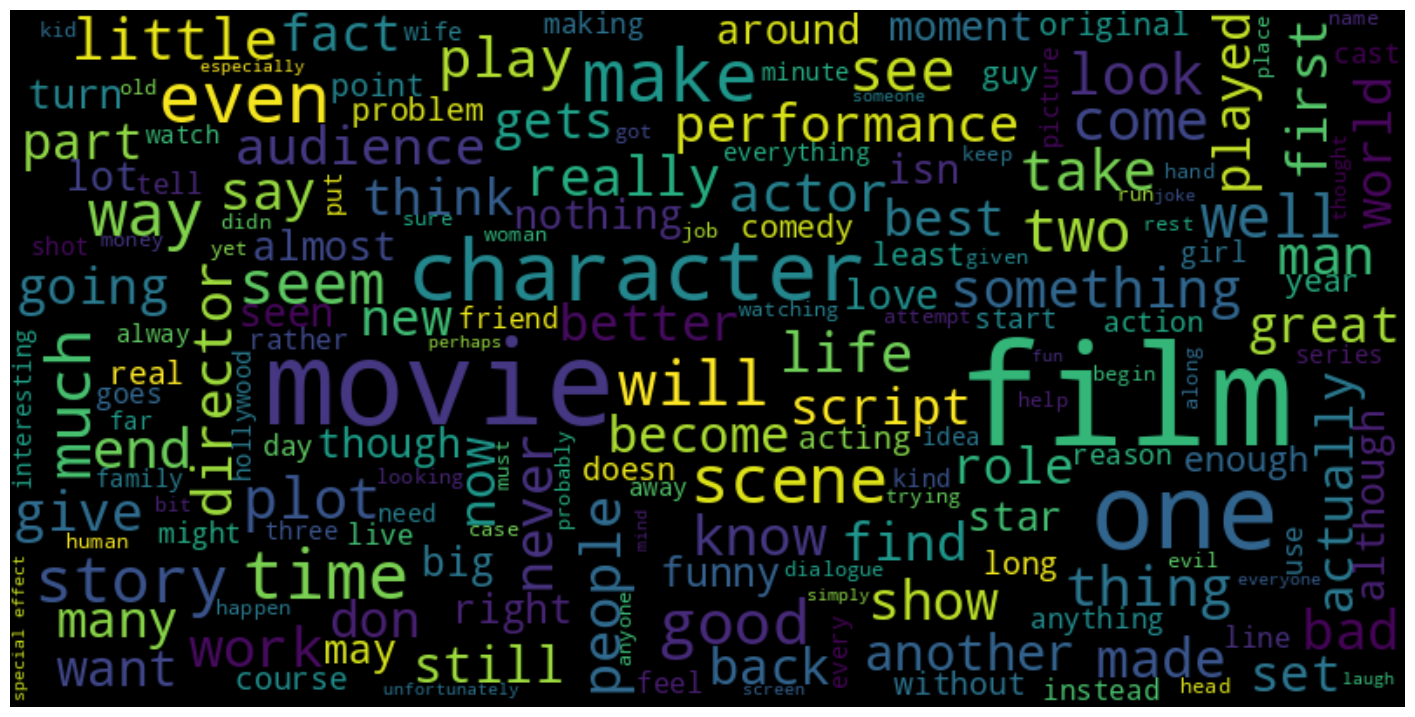

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

## Vettorizzazione

In [30]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TF-IDF
he TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".The term frequency is calculated as:

- Term frequency = (Number of Occurrences of a word)/(Total words in the document)

- IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

In [12]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [32]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6768867924528302

In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.7240566037735849

In [34]:
labels = ['Class0', 'Class1']

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Class0       0.71      0.99      0.83       287
      Class1       0.86      0.18      0.29       137

    accuracy                           0.72       424
   macro avg       0.79      0.58      0.56       424
weighted avg       0.76      0.72      0.65       424



Text(95.72222222222221, 0.5, 'Actual')

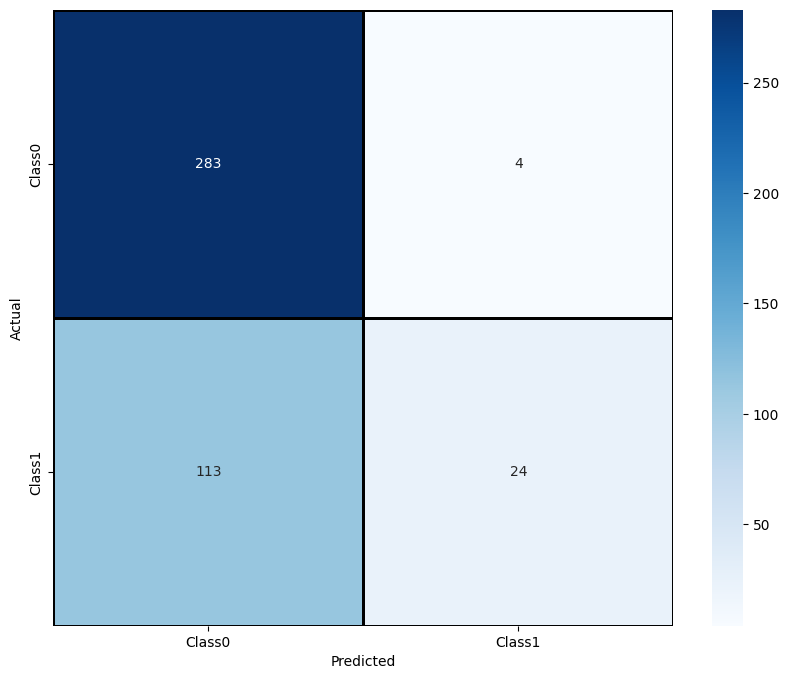

In [35]:
labels = ['Class0', 'Class1']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [36]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.6768867924528302

In [43]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(stop_words='english')
tfidf = TfidfTransformer()
clf = classifier = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.714622641509434


In [44]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Class0       0.71      0.99      0.82       287
      Class1       0.90      0.13      0.23       137

    accuracy                           0.71       424
   macro avg       0.80      0.56      0.53       424
weighted avg       0.77      0.71      0.63       424



Text(95.72222222222221, 0.5, 'Actual')

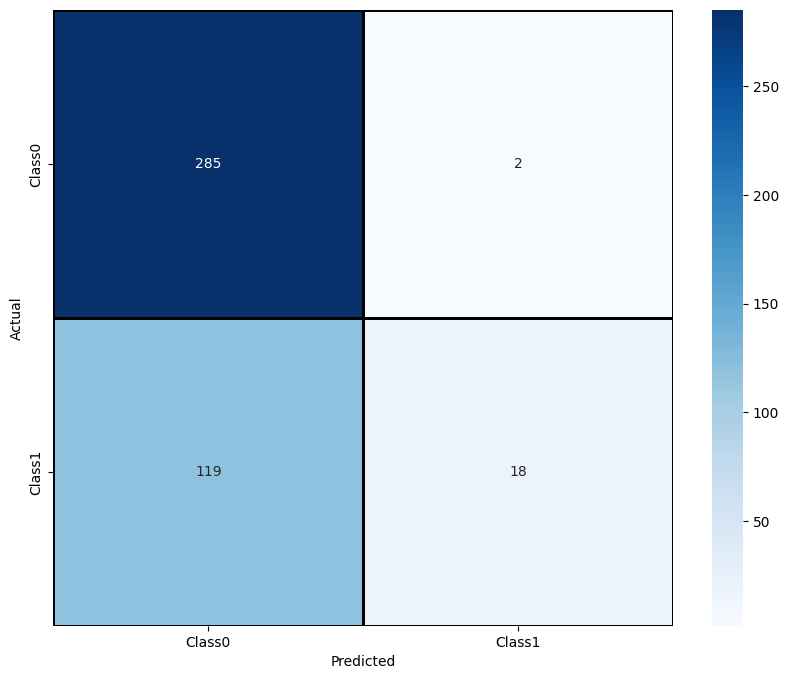

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [46]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.75706215 0.71186441 0.75141243 0.71186441 0.76836158 0.74431818
 0.74431818 0.73863636]
mean=0.7409797123780175
std=0.01884289369860785


In [47]:
import joblib
joblib.dump(pipe,'NLPes0.pkl')

['NLPes0.pkl']

In [51]:
import joblib

uploaded_model = joblib.load('NLPes0.pkl')
pred = uploaded_model.predict(['very beautiful']) # 1 --> Diabetic
pred[0]

0